In [76]:
import csv
import matplotlib.pyplot as plot
import numpy as np

class Extract:
    def FromCSV(self, filePath):
        try:
            f = open(filePath)
        except FileNotFoundError:
            print("File Not Found!")
        dataset = list()
        reader = csv.DictReader(f, delimiter=',')
        for row in reader:
            dataset.append(row)
        f.close()
        return dataset
    
class Transform:    
    def BetweenYears(self, dataset, start, end):
        adding = False
        newDataset = list()
        for row in dataset:
            if int((list(row.values())[0])[-2:]) == int(str(start)[-2:]): #Starts adding at lower bound
                adding = True
            elif int((list(row.values())[0])[-2:]) == int(str(end)[-2:]): #Ends adding at upper bound
                adding = False
            if adding == True:
                newDataset.append(row)
        return newDataset
    
    def CountySelector(self, dataset, county):
        newDataset = list()
        for row in dataset:
            if list(row.values())[3] == county:
                newDataset.append(row)
        return newDataset

class Load:
    def ToCSV(self, filePath, dataset):
        try:
            f = open(filePath, "w", newline='')
        except FileNotFoundError:
            print("File Not Found!")
        writer = csv.writer (f,delimiter=',')
        writer.writerow(list(dataset[0].keys())) #adds titles
        for row in dataset:
            writer.writerow(list(row.values())) #adds data
        f.close()
    
e = Extract()
t = Transform()
l = Load()

originalDataset = e.FromCSV(filePath="project_data.csv")

datasetFa = t.CountySelector(originalDataset, "Fairfield")
datasetHa = t.CountySelector(originalDataset, "Hartford")
datasetLi = t.CountySelector(originalDataset, "Litchfield")
datasetMi = t.CountySelector(originalDataset, "Middlesex")

l.ToCSV(filePath="project_data_Fa.csv", dataset=datasetFa)
l.ToCSV(filePath="project_data_Ha.csv", dataset=datasetHa)
l.ToCSV(filePath="project_data_Li.csv", dataset=datasetLi)
l.ToCSV(filePath="project_data_Mi.csv", dataset=datasetMi)
    

In [80]:
def CountyData(dataset):
    mediumSP = list()
    averageSP = list()
    for row in dataset:
        mediumSP.append(float((list(row.values()))[1])/1000)
        averageSP.append(float((list(row.values()))[2])/1000)
    return mediumSP, averageSP

def LinePlots():
    mediumSPFa, averageSPFa = CountyData(datasetFa)
    mediumSPHa, averageSPHa = CountyData(datasetHa)
    mediumSPLi, averageSPLi = CountyData(datasetLi)
    mediumSPMi, averageSPMi = CountyData(datasetMi)
    date = np.zeros(len(mediumSPFa))
    for i in range(len(date)):
        date[i] = 2001 + i/12

    fig, axs = plot.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(date,mediumSPFa,color='green', label='Fairfield') 
    axs[0].plot(date,mediumSPHa,color='red', label='Hartford')
    axs[0].plot(date,mediumSPLi,color='blue', label='Litchfield') 
    axs[0].plot(date,mediumSPMi,color='yellow', label='Middlesex')
    axs[0].set_ylim(0, 750)
    axs[0].axvline(x = 2008, color = 'grey', linestyle='dashed')
    axs[0].set_xlabel("Year")
    axs[0].set_ylabel("Price (thousand $)")
    axs[0].legend(loc='lower left', prop={'size': 8})
    axs[0].set_xticks(np.arange(2000, 2024, 4))
    axs[0].set_yticks(np.arange(0, 800, 150))
    axs[0].grid()

    axs[1].plot(date,averageSPFa,color='green', label='Fairfield') 
    axs[1].plot(date,averageSPHa,color='red', label='Hartford')
    axs[1].plot(date,averageSPLi,color='blue', label='Litchfield') 
    axs[1].plot(date,averageSPMi,color='yellow', label='Middlesex')
    axs[1].set_ylim(0, 1200)
    axs[1].axvline(x = 2008, color = 'grey', linestyle='dashed')
    axs[1].set_xlabel("Year")
    axs[1].set_ylabel("Price (thousand $)")
    axs[1].legend(loc='lower left', prop={'size': 8})
    axs[1].set_xticks(np.arange(2000, 2024, 4))
    axs[1].set_yticks(np.arange(0, 1200, 200))
    axs[1].grid()
    plot.show()

def Histograms(arr):   
    plot.hist([arr[0][:], arr[2][:], arr[4][:], arr[6][:], arr[8][:], arr[10][:], arr[12][:], arr[14][:], arr[16][:], arr[18][:]], bins = 5,label=["2001", "2003","2005","2007","2009","2011","2013","2015","2017", "2019" ])
    plot.ylabel("Abundance")
    plot.xlabel("Price (thousand $)")
    plot.legend()
    plot.show()
    
def SalesPriceBarCharts(salesPrice):
    x = ["Fa","Ha", "Li", "Mi", "NeH", "NeL", "Co", "To", "Wi"]
    y = list()
    y2007 = list()
    y2017 = list()
    for i in range(9):
        y.append(((salesPrice[16][i] - salesPrice[6][i])/salesPrice[16][i])*100)
        y2007.append(salesPrice[6][i])
        y2017.append(salesPrice[16][i])
    fig, axs = plot.subplots(1, 2, figsize=(15, 5))
    axs[0].bar(x,y2007, label="2007")
    axs[0].bar(x,y2017, label="2017")
    axs[0].set_xlabel("Counties")
    axs[0].set_ylabel("Price (thousand $)")
    axs[0].legend()
    axs[1].bar(x,y)
    axs[1].set_xlabel("Counties")
    axs[1].set_ylabel("Percentage")
    plot.show()

arr = np.zeros((22,108))
averageMediumSP = np.zeros((22,9))
averageAverageSP = np.zeros((22,9))
year = 0
month = 0
county = 0
for row in originalDataset:
    arr[year][month + (county*12)] = float((list(row.values()))[1])/1000
    averageMediumSP[year][county] += float((list(row.values()))[1])/12000
    averageAverageSP[year][county] += float((list(row.values()))[2])/12000
    month += 1
    if month == 12:
        month = 0
        year += 1
    if year == 22:
        year = 0
        county += 1 

# The Effect of the 2008 Finanial crisis on the housing market in Connecticut and how it can inform future investors
## Median and Average Sales Price of Single Family Housing units

Aim - The aim of this project was to look at the sales price of single family housing units within connecticut from 2001 - 2022 with the main focus on the years regarding the 2008 financial housing crisis. This was done to get an insite into how the initial value of the property effected the stability of the sales price through the crisis to inform potencial investors regarding the risk of varying priced units.

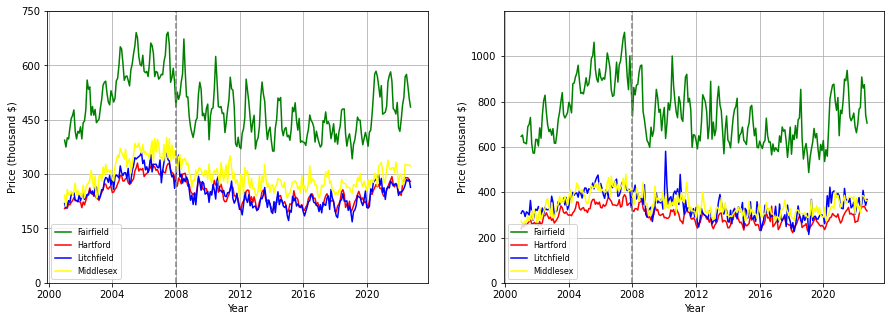

In [78]:
LinePlots()

Figure 1a) and 1b) shows the median and average sales price of single family housing units from the year 2001 - 2022 for 4 of the 9 counties within Connecticut. "Fairfield" was chosen deliberatly as it is the most expesive county while all the other counties are arbitrarty. A dashed line indicated the start of 2008 and a clear down turn in the sales price can been seen preceding. Also, on an unrelated note a substancial increase in the sale price can be obsreved in 2020 due to the Covid19 pandemic ,but this is unimportant for this analysis.

## Abundace of Single Family Housing units over varying Price Ranges

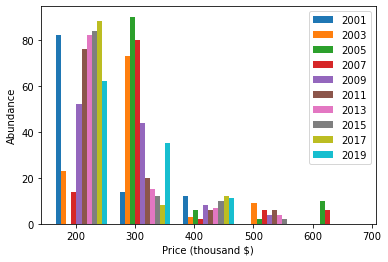

In [73]:
Histograms(arr)

As can been seen figure 2 shows the abudance of housing units of varying sales price ranges over mulitple years. It can been seen that from 2001 to 2007 there is an increase in the abundance of $250k - $350k housing units from the $150k - $250k bins. Then from 2009 to 2017 there is a drastic decrease in the abundance of $250k - $350k housing units and the increase in $150k - $250k housing units.

## Change in Median and Average Sales Price from 2007 - 2017 for different counties

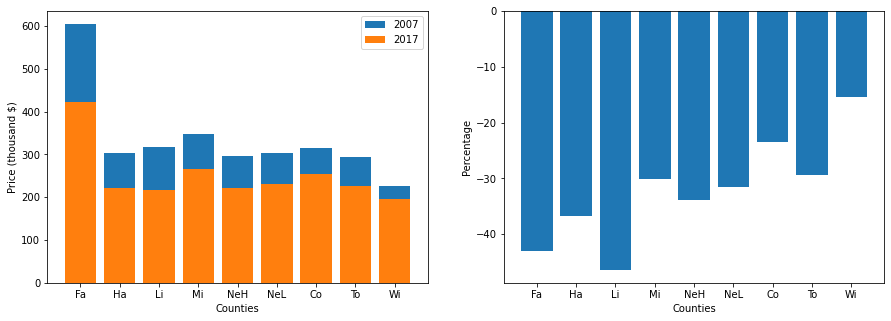

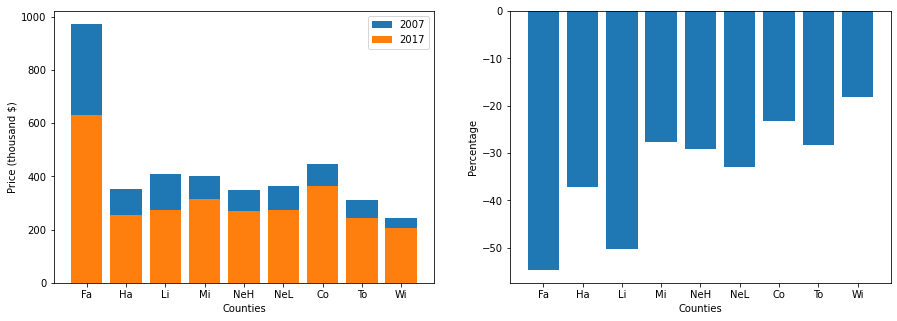

In [75]:
SalesPriceBarCharts(averageMediumSP)
SalesPriceBarCharts(averageAverageSP)

In [ ]:
Counties 
Fa = Fairfield 
Ha = Hartford 
Li = Litchfield 
Mi = Middlesex 
NeH = New Haven 
NeL = New London 
Co = Connecticut 
To = Tolland 
Wi = Windham

Figure 4a) and 4c) shows the median and average sales price of single family housing units for different counties for 2007 and 2017 while figure 4b) and 4d) represents the percentage sales price drop for different counties between 2007 and 2017.
These dates where chosen as 2007 was just before the financial crisis and 2017 being 10 years after.

As can been seen in these figures, the reduction in the sales price is positivly correlated to the overall value of the property. For example, the most expensive county "Fairfield" had over a 50% reduction in the medium and average sales price of their properties from 2007 to 2017, while the cheapest county "Windham" had only a 15% reduction over the same time period.

In conclusion, cheaper properties lose less value in the event of a recession, also noting that 2008 was caused by the housing market, therefore, are a less risky invesntment.

If i had more time i would implement a sorting algorithm to put the counties in sales price order and plot the perecentage loss vs total sales price and try and calculate the correlation using the R^2 value.
